# GIK2KM - Lab 2 - Hypothoses Testing in Python

## Warming up in Python

In [1]:
import pandas as pd

# Create a DataFrame with the samples
values = pd.DataFrame([26, 37, 56, 89, 19, 86, 97, 62, 58, 5, 18, 15])

# Print median, mean, max, min, standard deviation, number of samples
values.describe()

,0
count,12.000000
mean,47.333333
std,31.858589
min,5.000000
25%,18.750000
50%,46.500000
75%,68.000000
max,97.000000


In [2]:
# Sort the values in ascending order
values.sort_values(by=0, ascending=True)

,0
9,5
11,15
10,18
4,19
0,26
1,37
2,56
8,58
7,62
5,86


In [3]:
# Sort the values in descending order
values.sort_values(by=0, ascending=False)

,0
6,97
3,89
5,86
7,62
8,58
2,56
1,37
0,26
4,19
10,18


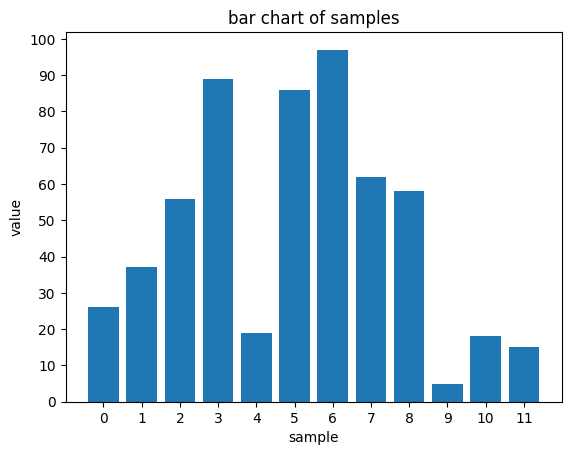

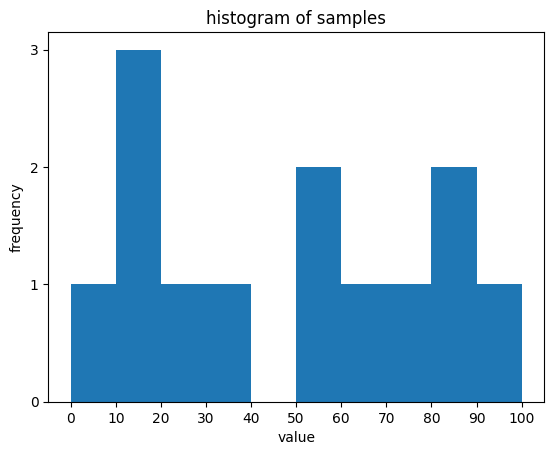

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the values in a bar chart
fig,ax = plt.subplots(1,1)
ax.set_title("bar chart of samples")
ax.bar(np.arange(0,12,1), values[0])
ax.set_xlabel("sample")
ax.set_xticks(np.arange(0,12,1))
ax.set_ylabel("value")
ax.set_yticks(np.arange(0,100.1,10))
plt.show()

# Plot the values in a histogram
fig,ax = plt.subplots(1,1)
ax.set_title("histogram of samples")
ax.hist(values, bins = [0,10,20,30,40,50,60,60,80,90,100])
ax.set_xlabel("value")
ax.set_xticks(np.arange(0,100.1,10))
ax.set_ylabel("frequency")
ax.set_yticks(np.arange(0,4,1))
plt.show()

## One Sample t-test: Compare the mean of a single sample with a known population mean

1. Watch this movie clip: One Sample t-Test [4 min], in where a one sample t-test is performed manually using look-up tables and so on.

(a) Notes: In the video, the significance level is 5%, i.e. α = 0.05. The degrees of freedom (df) is 29, which is the number of samples minus 1 (You don’t have to think about the df when using Python!). The test statistic (shown after 3min:30sec in the video) i.e. the t-value is computed by a built-in in function in Python.

2. When searching for tests you will often find the z-test, as well as the t-test. What is the basic difference in between a z-test and a t-test?

**Answer:  
To use the z test one need to know the SD (standard deviation) for the whole population. If the SD for the population is unknown, it needs to be estimated with the t-test.**

3. By using Python, repeat the same One-sample t-test as shown in the video. Note: You do should not use a t-distribution look-up table as in the video. Instead, an exact p-value will be computed for you in Python! Compare the results! They should be just about the same as in the video ... :)

Use this data set for the analysis:  
125.2994, 126.4402, 171.2639, 143.5338, 160.2288, 97.2396, 132.6253, 125.3658, 157.1991, 155.7616, 130.6605, 149.1697, 134.3806, 138.2204, 146.3384, 117.8715, 152.3988, 172.9519, 159.7141, 132.7292, 137.4430, 190.0342, 116.9569, 134.5817, 149.3947, 130.4849, 124.4223, 127.3084, 108.9376, 151.0511

**Answer:**  
H0; μ = 100 (Mean IQ for the population.)  
H1; μ ≠ 100 (Mean IQ for the sample population is not 100)  
alpha; α = 0.05 (We'll use a significance level/alpha of 0.05 to calculate a 95% confidence interval.)  

In [5]:
import pandas as pd

data = pd.DataFrame([125.2994, 126.4402, 171.2639, 143.5338, 160.2288, 97.2396, 132.6253, 125.3658, 157.1991, 155.7616, 130.6605, 149.1697, 134.3806, 138.2204, 146.3384, 117.8715, 152.3988, 172.9519, 159.7141, 132.7292, 137.4430, 190.0342, 116.9569, 134.5817, 149.3947, 130.4849, 124.4223, 127.3084, 108.9376, 151.0511])

# Show a summary of the data
data.describe()

,0
count,30.000000
mean,140.000247
std,19.997537
min,97.239600
25%,126.657250
50%,136.012350
75%,152.061875
max,190.034200


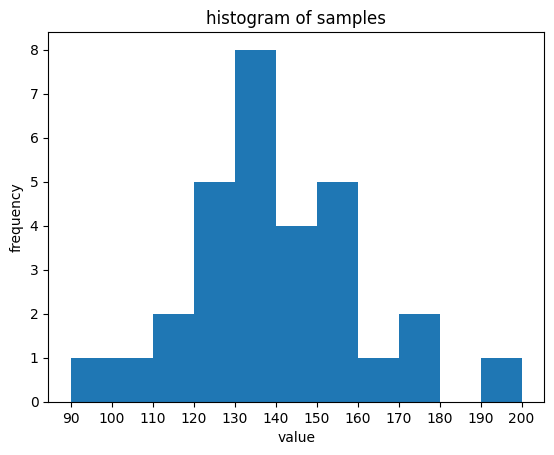

In [6]:
import matplotlib.pyplot as plt

# Plot the data in a histogram
fig,ax = plt.subplots(1,1)
ax.set_title("histogram of samples")
ax.hist(data, bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
ax.set_xlabel("value")
ax.set_xticks(np.arange(90,200.1,10))
ax.set_ylabel("frequency")
plt.show()

In [7]:
import scipy.stats as stats

# Calculate t-critical value
alpha = 0.05
t_critical = stats.t.ppf(1-alpha/2, len(data)-1)

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(data, 100)

print("T-critical value:", t_critical)
print("T-statistic value:", t_stat)
print("P-value:", p_value)

T-critical value: 2.0452296421327034
T-statistic value: [10.95586801]
P-value: [7.99690789e-12]


**Answer:**  
t = 10.96 > 2.0452, p < 0.05

Because t-statistic is well above our t-critical value we can reject the H0 hypothesis. The medication did effect the result in a positive way.

## The One Sample t-test

Data: <http://users.du.se/~rny/data/ai-datascience/courseresults3.csv>

A random sample of 30 seventh grade pupils marks have ben collected, in where marks range from 1 (worst) to 6 (excellent). The mean grade of all seventh grade pupils of the last five years was 4.2.
Is the mean of the sample of 30 pupils statistically different from the populations mean?

**Answer:**  
H0 = The mean grade of the last five years is 4.2.  
H1 = The mean grade of this year is NOT 4.2.  

Grade    float64
dtype: object 

           Grade
count  30.000000
mean    4.650000
std     1.026796
min     1.500000
25%     4.500000
50%     5.000000
75%     5.000000
max     6.000000


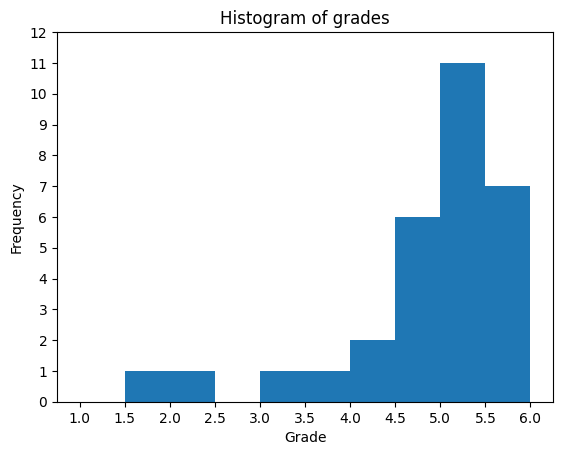

In [8]:
import pandas as pd
import numpy as np

# Import data set and create a data frame
gradeData = pd.read_csv('https://users.du.se/~rny/data/ai-datascience/courseresults3.csv')

# Print the data types of the values
print(gradeData.dtypes, "\n")

# Display summary statistics
print(gradeData.describe())

# Plot the data
fig,ax = plt.subplots(1,1)
ax.set_title("Histogram of grades")
ax.hist(gradeData['Grade'], bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ax.set_xlabel("Grade")
ax.set_xticks(np.arange(1,6.1,0.5))
ax.set_ylabel("Frequency")
ax.set_yticks(np.arange(0,12.1,1))
plt.show()

**Answer:**  
Standard deviation: 1.026796  
Mean: 4.65  
Median: 5.0  

In [9]:
import scipy.stats as stats

alpha = 0.05
t_critical = stats.t.ppf(1-alpha/2, len(data)-1)

t_stat, p_value = stats.ttest_1samp(gradeData['Grade'], 4.2)

print("T-critical value:", t_critical)
print("T-statistic value:", t_stat)
print("P-value:", p_value)

n = gradeData['Grade'].count()
m = gradeData['Grade'].mean()
std = gradeData['Grade'].std()
margin_of_error = t_critical * std / np.sqrt(n)
confidence_interval = (m - margin_of_error, m + margin_of_error)
print("Confidence interval:", confidence_interval)

T-critical value: 2.0452296421327034
T-statistic value: 2.4004292338975812
P-value: 0.023016789824932483
Confidence interval: (4.266588014358859, 5.033411985641142)


Because t_statistic > t_critical we will reject H0 (null hypothesis). The increase is statistically significant.

## The Two-sample Independent t-test

You have installed a heavy CPU demanding application on a new server. The same application also resides on an older server. You would like to test if there is there is a difference between the application execution time on the new server and the old server.
You execute the application several times on the new server and on the old server. You measure the execution time (sec) and the output is tab separated text-file.

**Answer:**  
H0 = μ; Mean execution time of old server (Baseline)  
H1 = μ; Mean execution time of new server; H1 ≠ H0 (Is faster or slower than old server)  

NewServer    float64
OldServer    float64
dtype: object 

       NewServer  OldServer
count  15.000000  15.000000
mean   40.666667  44.426667
std     4.018647   6.019666
min    34.100000  34.800000
25%    39.500000  42.400000
50%    40.800000  43.500000
75%    42.350000  47.850000
max    50.100000  53.800000


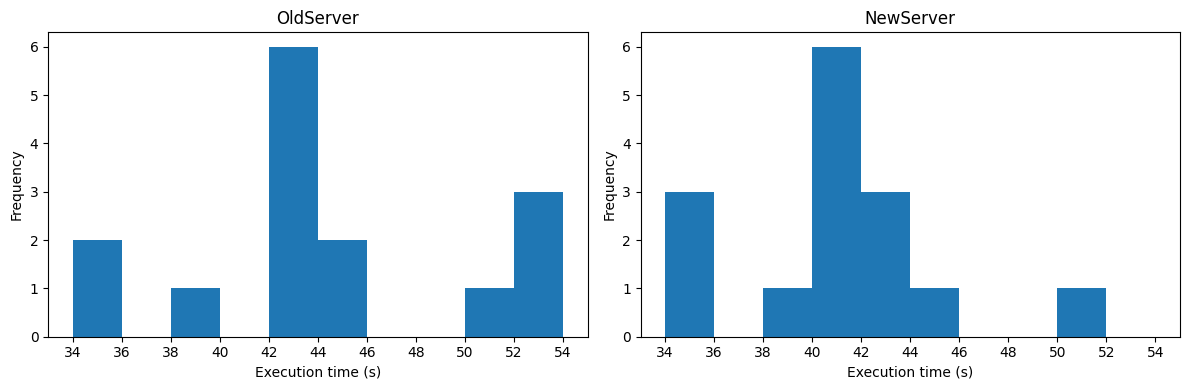

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data set and create a data frame
execData = pd.read_csv('https://users.du.se/~rny/data/ai-datascience/server2.txt', delim_whitespace=True)

# Print the data types of the values
print(execData.dtypes, "\n")

# Display summary statistics
print(execData.describe())

# Create a single figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data for OldServer in a histogram
ax1 = axes[0]
ax1.set_title("OldServer")
ax1.hist(execData['OldServer'], bins=[34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54])
ax1.set_xlabel("Execution time (s)")
ax1.set_xticks(np.arange(34, 54.1, 2))
ax1.set_ylabel("Frequency")
start, end = ax1.get_ylim()
ax1.set_yticks(np.arange(start, end, 1))

# Plot the data for NewServer in a histogram
ax2 = axes[1]
ax2.set_title("NewServer")
ax2.hist(execData['NewServer'], bins=[34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54])
ax2.set_xlabel("Execution time (s)")
ax2.set_xticks(np.arange(34, 54.1, 2))
ax2.set_ylabel("Frequency")
start, end = ax2.get_ylim()
ax2.set_yticks(np.arange(start, end, 1))

plt.tight_layout()
plt.show()


In [11]:
# Two-sample t-test
import scipy.stats as stats

# Calculate t-critical value
alpha = 0.05
t_critical = stats.t.ppf(1-alpha/2, len(execData)-1)

# Compare samples by conducting the test
t_stat, p = stats.ttest_ind(execData['OldServer'], execData['NewServer'])
print("T-critical value:", t_critical)
print("T-statistic value:", t_stat)
print("P-value:", p)

# Mean of OldServer and NewServer
m1 = execData['OldServer'].mean()
m2 = execData['NewServer'].mean()
print("Mean of OldServer:", m1)
print("Mean of NewServer:", m2)

n1 = execData['OldServer'].count()
std1 = execData['OldServer'].std()
margin_of_error1 = t_critical * std1 / np.sqrt(n1)
confidence_interval1 = (m1 - margin_of_error1, m1 + margin_of_error1)
print("Confidence interval (Old server):", confidence_interval1)

n2 = execData['NewServer'].count()
std2 = execData['NewServer'].std()
margin_of_error2 = t_critical * std2 / np.sqrt(n2)
confidence_interval2 = (m2 - margin_of_error2, m2 + margin_of_error2)
print("Confidence interval (New server):", confidence_interval2)

T-critical value: 2.1447866879169273
T-statistic value: 2.011992001694577
P-value: 0.05393206433583471
Mean of OldServer: 44.426666666666655
Mean of NewServer: 40.66666666666666
Confidence interval (Old server): (41.09308664824952, 47.76024668508379)
Confidence interval (New server): (38.44121412918716, 42.892119204146155)


**Answer:**  
Because P > 0.05 H0 should not be rejected.